Fungsi ini membuat dan mengembalikan matriks 2D (daftar bersarang) dengan M baris dan N kolom. Setiap elemen dari matriks ini diinisialisasi dengan nilai 0.

In [1]:
def alokasi_citra(M, N):
    """
    Mengalokasikan memori untuk citra f yang berukuran M x N pixel.
    """
    f = [[0 for _ in range(N)] for _ in range(M)]
    return f


Fungsi dealokasi(f) bertujuan untuk membebaskan memori yang telah dialokasikan untuk citra yang direpresentasikan oleh matriks f.

In [2]:
def dealokasi(f):
    """
    Dealokasi memori dari citra f.
    """
    for row in f:
        del row
    del f


digunakan untuk alokasi memori citra, melakukan operasi pada citra tersebut, dan akhirnya, ketika citra tidak lagi diperlukan, membebaskan memori dengan menggunakan fungsi dealokasi.







In [3]:
citra_f = alokasi_citra(10, 10)  # Contoh alokasi citra 10x10
# ... Lakukan operasi pada citra ...
dealokasi(citra_f)  # Dealokasi memori


bertujuan untuk melakukan alokasi memori dan memeriksa apakah alokasi tersebut berhasil

In [4]:
def alokasi(M, N, UkuranElemen):
    """
    Mengalokasikan memori untuk matriks M x N.
    Setiap elemen matriks berukuran UkuranElemen byte.
    """
    larik = []
    for i in range(M):
        larik.append([0] * N * UkuranElemen)
    return larik

def xalloc(ukuran):
    """
    Mengalokasikan memori dan memeriksa apakah alokasi memori berhasil.
    """
    p = [0] * ukuran
    if p == None:
        print("Memori tidak cukup untuk alokasi matriks")
        exit(0)
    return p


untuk mengalokasikan memori untuk matriks dengan parameter M baris, N kolom, dan setiap elemen berukuran UkuranElemen byte.

In [5]:
M = 3
N = 3
UkuranElemen = 4

matriks = alokasi(M, N, UkuranElemen)
# ...
# Lakukan operasi pada matriks
# ...


Fungsi setpixel pada kode di atas bertujuan untuk mengatur nilai komponen warna (r, g, b) pada koordinat (i, j) dalam gambar dan putpixel dari modul Image untuk menetapkan nilai pixel pada koordinat (i, j) dengan warna yang ditentukan oleh komponen r, g, dan b.

In [6]:
from PIL import Image

def setpixel(r, g, b, i, j, image):
    """
    Menampilkan pixel dengan komponen rgb pada koordinat i, j.
    """
    image.putpixel((i, j), (r, g, b))


Kode tersebut memperlihatkan contoh penggunaan dari fungsi setpixel yang telah Anda definisikan.

In [8]:
# Contoh penggunaan
image = Image.new("RGB", (100, 100))  # Membuat gambar 100x100 pixel
setpixel(255, 0, 0, 50, 50, image)  # Menetapkan warna merah pada koordinat (50, 50)
image.show()  # Menampilkan gambar


Fungsi tampilkan_citra yang telah Anda definisikan bertujuan untuk menampilkan citra yang direpresentasikan oleh matriks r, g, dan b ke layar. Matriks ini mengandung komponen warna merah (r), hijau (g), dan biru (b) dari setiap piksel dalam citra.
Fungsi ini membuat objek gambar baru dengan ukuran (N, M) menggunakan Image.new("RGB", (N, M)). Selanjutnya, ia melakukan iterasi melalui matriks dan menggunakan putpixel untuk menetapkan warna RGB ke koordinat yang sesuai.

Akhirnya, gambar yang telah diperbarui ditampilkan menggunakan image.show().

In [9]:
from PIL import Image

def tampilkan_citra(r, g, b, M, N):
    """
    Menampilkan citra yang berukuran M x N pixel ke layar.
    """
    image = Image.new("RGB", (N, M))

    for i in range(M):
        for j in range(N):
            image.putpixel((j, i), (r[i][j], g[i][j], b[i][j]))

    image.show()


menampilkan citra dengan matriks komponen warna merah, hijau, dan biru.

In [10]:
M = 3
N = 3

# Contoh matriks r, g, dan b
r = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
g = [[0, 255, 0], [0, 0, 255], [255, 0, 0]]
b = [[0, 0, 255], [255, 0, 0], [0, 255, 0]]

tampilkan_citra(r, g, b, M, N)


membuka dan menampilkan gambar "ripani.jpg" menggunakan pustaka matplotlib dan PIL (Python Imaging Library).

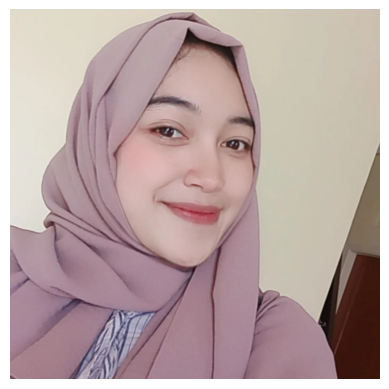

In [11]:
from matplotlib import pyplot as plt
from PIL import Image

# Load gambar dari file
img = Image.open("ripani.jpg")

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Matikan sumbu koordinat
plt.show()


membaca citra dari file citra mentah.

In [14]:
def baca_citra_dari_arsip(nama_arsip):
    """
    Membaca citra dari file citra mentah. Citra hasil pembacaan disimpan di dalam matriks f.
    """
    try:
        with open(nama_arsip, "rb") as fp:
            M = int.from_bytes(fp.read(2), byteorder='little')  # baca tinggi citra
            N = int.from_bytes(fp.read(2), byteorder='little')  # baca lebar citra

            f = alokasi(M, N)  # alokasi memori matriks untuk citra f
            if f is None:
                print("Memori tidak cukup")
                return None

            # baca data citra baris demi baris
            for i in range(M):
                # baca data citra baris ke-i
                f[i] = list(fp.read(N))  # baca data citra baris ke-i

            return f

    except FileNotFoundError:
        print("Arsip tidak ada")
    except Exception as e:
        print("Terjadi kesalahan:", e)

    return None


Fungsi tulis_citra_ke_arsip(nama_arsip, f) yang Anda definisikan bertujuan untuk menulis citra yang direpresentasikan oleh matriks f ke dalam sebuah arsip dengan nama tertentu.

In [15]:
def tulis_citra_ke_arsip(nama_arsip, f):
    """
    Menulis citra f ke dalam arsip nama_arsip.
    """
    try:
        M = len(f)  # Mengambil tinggi citra
        N = len(f[0])  # Mengambil lebar citra

        with open(nama_arsip, "wb") as fp:
            fp.write(M.to_bytes(2, byteorder='little'))  # tulis tinggi citra
            fp.write(N.to_bytes(2, byteorder='little'))  # tulis lebar citra

            # Tulis data citra baris demi baris
            for i in range(M):
                # Tulis data citra baris ke-i
                fp.write(bytes(f[i]))

    except Exception as e:
        print("Terjadi kesalahan:", e)

# Contoh penggunaan:
# tulis_citra_ke_arsip("citra.dat", citra)
